# **Customer Sentiment Analysis for British Airways**
### Using Data to Improve Customer Experience


This project aims to analyze customer reviews from British Airways to better understand their sentiments. By leveraging web scraping, data cleaning, and sentiment analysis, this project provides insights that can help British Airways improve customer service.


## **Table of Contents**
1. [Data Scraping](#data-scraping)
2. [Data Cleaning](#data-cleaning)
3. [Sentiment Analysis](#sentiment-analysis)
4. [Visualizations](#visualizations)
5. [Conclusions](#conclusions)


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

<a id="data-scraping"></a>
# Data Scraping

We collected customer review data for British Airways using web scraping techniques. By extracting reviews from the Airline Quality website, we can gather 1,000 reviews across multiple pages. This data provides raw insights into customer experiences, which we clean and analyze in the next steps.


In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | British Airways World Trav...
1,✅ Trip Verified | BA is barely a step above ...
2,Not Verified | Happy with the flight crew. Ha...
3,✅ Trip Verified | Horrible service from boar...
4,Not Verified | My wife and I are very disappo...


In [ ]:
df.to_csv("data/BA_reviews.csv")

Now we have our dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing to do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

<a id="data-cleaning"></a>
# Data Cleaning

To prepare the scraped data for analysis, we removed unnecessary text elements such as "Trip Verified" and "Not Verified" from the reviews. Cleaning the data allows us to focus solely on the customer feedback, improving the quality of the sentiment analysis.


In [ ]:
# Clean the review data
df['cleaned_reviews'] = df['reviews'].str.replace("Not Verified", "").str.replace("✅ Trip Verified", "").str.strip()

df.head()  # View cleaned data


,reviews,cleaned_reviews
0,✅ Trip Verified | British Airways World Trav...,| British Airways World Traveller Plus (Prem...
1,✅ Trip Verified | BA is barely a step above ...,| BA is barely a step above low cost airline...
2,Not Verified | Happy with the flight crew. Ha...,| Happy with the flight crew. Hadn't been on ...
3,✅ Trip Verified | Horrible service from boar...,| Horrible service from boarding to landing....
4,Not Verified | My wife and I are very disappo...,| My wife and I are very disappointed with fl...


<a id="sentiment-analysis"></a>
# Sentiment Analysis

Sentiment analysis is the process of classifying text as positive, negative, or neutral. In this project, we applied sentiment analysis using the TextBlob library, which measures the polarity of customer reviews. The analysis helps understand the overall mood of the reviews, highlighting both satisfied and dissatisfied customers.


In [ ]:
!pip install textblob
from textblob import TextBlob

# Define a function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis to cleaned reviews
df['Sentiment'] = df['cleaned_reviews'].apply(get_sentiment)

# View sentiment counts
df['Sentiment'].value_counts()


,count
Sentiment,
Positive,613
Negative,376
Neutral,11


<a id="visualizations"></a>
# Visualizations

Visualizing data is key to identifying trends and patterns. We generated a pie chart that shows the distribution of sentiment (positive, negative, and neutral) among British Airways customers. Additionally, a word cloud visualizes the most common words in the reviews, providing insights into frequent customer topics or complaints.


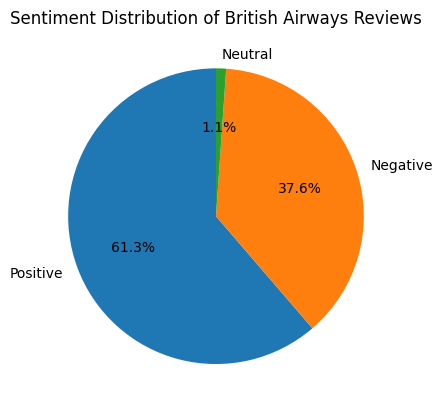

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution of British Airways Reviews')
plt.show()


In [ ]:
!pip install wordcloud


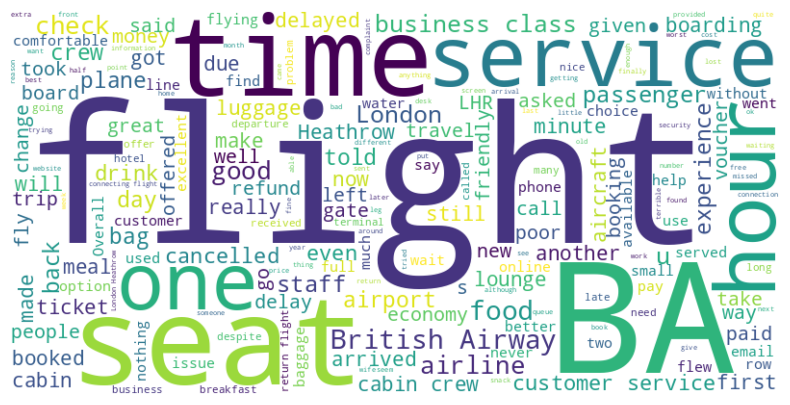

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string for the word cloud
all_reviews = ' '.join(df['cleaned_reviews'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<a id="conclusions"></a>
# Conclusions

The analysis revealed that over 61% of reviews were positive, with the most frequently mentioned words including "flight," "service," and "seat." This indicates that customer service and comfort are prominent areas of focus for customers. Negative reviews often pointed to issues with delays and customer support. These insights can help British Airways enhance customer satisfaction by addressing common pain points highlighted in the reviews.
